## Условие задачи 1

Посредством II закона Ньютона можно вывести, что скорость парашютиста находится по формуле $v = \frac{gm}{c}(1 − e^{−\frac{c}{m}t})$. Найдите, пользуясь методом дихотомии, regula falsi и модифицированным regula falsi коэффициент лобового сопротивления $c$, который позволит парашютисту массой $m = 68.1kg$, иметь скорость $v = 40m/s$ после свободного падения $t = 10s$ (пусть $g = 9.8m/s^2$). Сравнить методы

Перепишем уравнение в более удобной для понимания форме:

$$
\frac{gm}{c}(1 − e^{−\frac{c}{m}t}) - v = 0
$$

Теперь понятно, что мы ищем - точку пересечению оси $Ox$.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable
import time
import matplotlib.patches as mpatches

Зададим константы и возьмем $\varepsilon = 0.1$, так как константы заданы до первого числа после запятой.

In [24]:
m = 68.1
v = 40
t = 10
g = 9.8

eps = 0.1

$x = 0$ - асимптота гиперболы

In [25]:
y = lambda c: g*m/c*(1 - np.e ** (-c/m*t)) - v

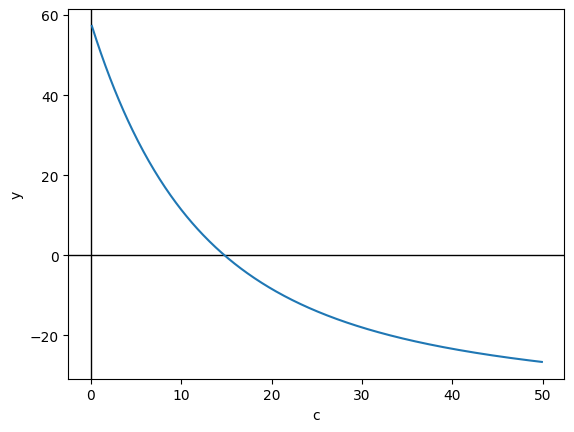

In [26]:
cs = np.arange(eps, 50, eps)
ys = y(cs)

plt.xlabel('c')
plt.ylabel('y')
plt.axhline(y=0, lw=1, color='k')
plt.axvline(x=0, lw=1, color='k')
plt.plot(cs, ys)

Видно, что точка корень находится где-то в районе 15.

## Метод дихотомии

In [27]:
def dichotomy(f: Callable[[float], float], a: float, b: float, eps: float, max_iter = -1):
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    intervals = [np.abs(b-a)]
    xs = []
    n_iter = 0
    while b - a > eps and (max_iter == -1 or n_iter < max_iter):
        c = (b+a) / 2
        xs.append(c)
        n_iter += 1
        match (f(a) * f(c) < 0, f(a) * f(c) > 0, f(a) * f(c) == 0):
            case (True, False, False):
                b = c
            case (False, True, False):
                a = c
            case (False, False, True):
                intervals.append(np.abs(b-a))
                return (c, intervals, n_iter)
        intervals.append(np.abs(b-a))
    xs.append(c)
    return (a, intervals, n_iter, xs)

## Метод regula falsi

In [28]:
def regula_falsi(f: Callable[[float], float], a: float, b: float, eps: float, max_iter = -1):
    fa = f(a)
    fb = f(b)
    if fa * fb > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    
    intervals = [np.abs(b-a)]
    xs = []
    n_iter = 0
    ea = 100.0
    c = b

    while (max_iter == -1 or n_iter < max_iter):
        c_prev = c
        c = b - fb * (a - b)/(fa - fb)
        xs.append(c)
        fc = f(c)
        n_iter += 1

        if c != 0:
            ea = np.abs(c - c_prev)
        
        test = fa * fc
        if test < 0:
            b = c
            fb = fc
        elif test > 0:
            a = c
            fa = fc
        else:
            ea = 0

        intervals.append(np.abs(b-a))
        
        if ea < eps:
            break

    return (c, intervals, n_iter, xs)

In [29]:
def regula_falsi_modified(f: Callable[[float], float], a: float, b: float, eps: float, max_iter = -1):
    fa = f(a)
    fb = f(b)
    if fa * fb > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    
    intervals = [np.abs(b-a)]
    xs = []
    n_iter = 0
    iter_a = 0
    iter_b = 0
    ea = 100.0
    c = b


    while (max_iter == -1 or n_iter < max_iter):
        c_prev = c
        c = b - fb * (a - b)/(fa - fb)
        xs.append(c)
        fc = f(c)
        n_iter += 1
        if c != 0:
            ea = np.abs(c - c_prev)
        
        test = fa * fc
        if test < 0:
            b = c
            fb = fc
            iter_a = 0
            iter_b += 1
            if iter_b >= 2:
                fa /= 2
        elif test > 0:
            a = c
            fa = fc
            iter_b = 0
            iter_a += 1
            if iter_a >= 2:
                fb /= 2
        else:
            ea = 0
            
        intervals.append(np.abs(b-a))
        
        if ea < eps:
            break

    return (c, intervals, n_iter, xs)



## Сравнение методов

### Зависимость длины отрезка $[a ; b]$ от количества итераций

$$
\frac{b-a}{2^n}, 
\\
\text{где } n - \text{ количество итераций}
$$

In [30]:
max_iter = 52
b = 2**max_iter
a = eps
ns = np.arange(0, max_iter+1, 1)

In [31]:
print(f"Коэффициент лобового сопротивления c = {dichotomy(y, a, b, eps)[0]} - метод дихотомии")
print(f"Коэффициент лобового сопротивления c = {regula_falsi(y, a, b, eps)[0]} - regula falsi")
print(f"Коэффициент лобового сопротивления c = {regula_falsi_modified(y, a, b, eps)[0]} - regula falsi modified")

Коэффициент лобового сопротивления c = 14.724999999999998 - метод дихотомии
Коэффициент лобового сопротивления c = 14.877127129881785 - regula falsi
Коэффициент лобового сопротивления c = 14.780422981580854 - regula falsi modified


### $\frac{gm}{c}(1 − e^{−\frac{c}{m}t}) - v = 0$


In [32]:
b = 25
a = 5
eps = 10**(-3)
ns = np.arange(0, 50, 1)

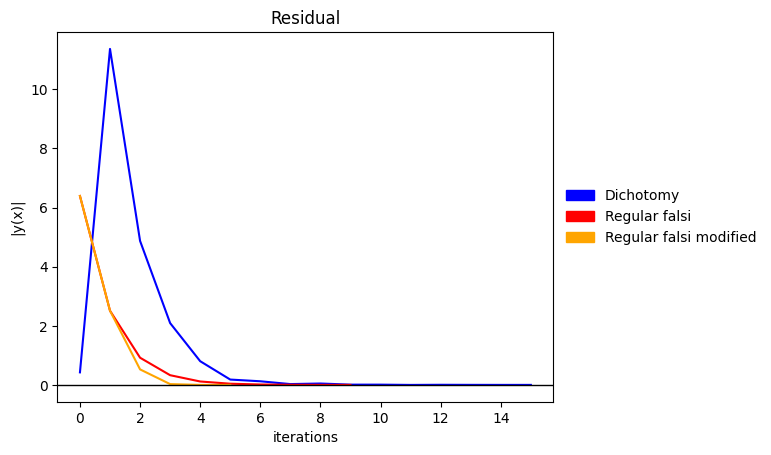

In [33]:
xs_dicho = dichotomy(y, a, b, eps, 100)[3]
xs_rf = regula_falsi(y, a, b, eps, 100)[3]
xs_rfm = regula_falsi_modified(y, a, b, eps, 100)[3]

residuals_dicho = [abs(y(x)) for x in xs_dicho]
residual_rf = [abs(y(x)) for x in xs_rf]
residual_rfm = [abs(y(x)) for x in xs_rfm]

plt.title('Residual')
plt.legend(handles=[mpatches.Patch(color='blue', label='Dichotomy'), mpatches.Patch(color='red', label='Regular falsi'), mpatches.Patch(color='orange', label='Regular falsi modified')], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.plot(ns[:len(residuals_dicho)], residuals_dicho, color='blue')
plt.plot(ns[:len(residual_rf)], residual_rf, color = 'red')
plt.plot(ns[:len(residual_rfm)], residual_rfm, color = 'orange')
plt.xlabel("iterations")
plt.ylabel("|y(x)|")
plt.axhline(y=0, lw=1, color='k')

plt.show()

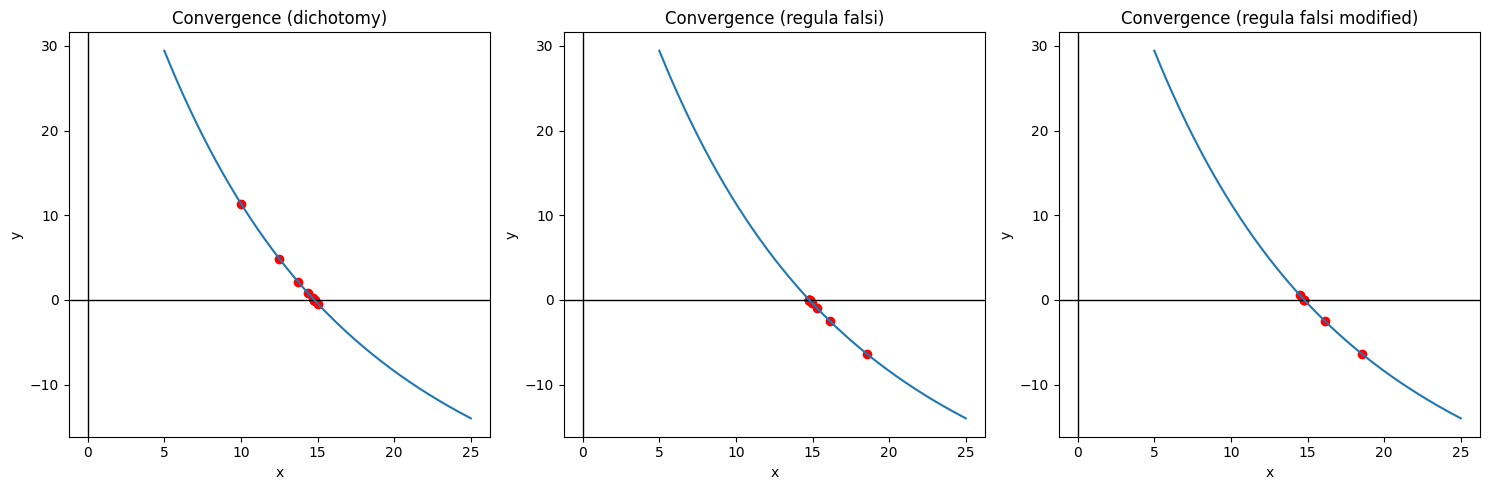

In [34]:
cs = np.arange(5, 25, eps)
ys = y(cs)

ys_dicho = [y(x) for x in xs_dicho]
ys_rf = [y(x) for x in xs_rf]
ys_rfm = [y(x) for x in xs_rfm]


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].set_title("Convergence (dichotomy)")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].axhline(y=0, lw=1, color='k')
axes[0].axvline(x=0, lw=1, color='k')
axes[0].plot(cs, ys)
axes[0].scatter(xs_dicho, ys_dicho, color='red')

axes[1].set_title("Convergence (regula falsi)")
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].axhline(y=0, lw=1, color='k')
axes[1].axvline(x=0, lw=1, color='k')
axes[1].plot(cs, ys)
axes[1].scatter(xs_rf, ys_rf, color='red')

axes[2].set_title("Convergence (regula falsi modified)")
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].axhline(y=0, lw=1, color='k')
axes[2].axvline(x=0, lw=1, color='k')
axes[2].plot(cs, ys)
axes[2].scatter(xs_rfm, ys_rfm, color='red')

plt.tight_layout()
plt.show()

### $x^3 + 0.0001 x - 0.0001 = 0$

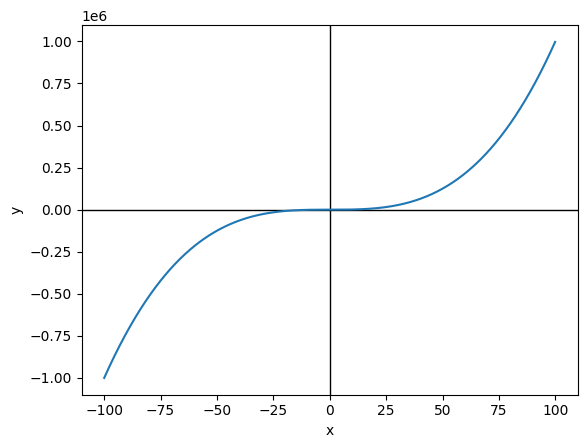

In [35]:
y = lambda x: x**3 + 0.0001 * x - 0.0001
cs = np.arange(-100, 100, 0.1)
ys = y(cs)

plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, lw=1, color='k')
plt.axvline(x=0, lw=1, color='k')
plt.plot(cs, ys)

In [36]:
b = 100
a = -80
eps = 10**(-3)
ns = np.arange(0, 1000, 1)

In [37]:
print(f"Коэффициент лобового сопротивления c = {dichotomy(y, a, b, eps)[0]} - метод дихотомии")
print(f"Коэффициент лобового сопротивления c = {regula_falsi(y, a, b, eps)[0]} - regula falsi")
print(f"Коэффициент лобового сопротивления c = {regula_falsi_modified(y, a, b, eps)[0]} - regula falsi modified")

Коэффициент лобового сопротивления c = 0.045013427734375 - метод дихотомии
Коэффициент лобового сопротивления c = -2.137327761786821 - regula falsi
Коэффициент лобового сопротивления c = 0.045382084219788274 - regula falsi modified


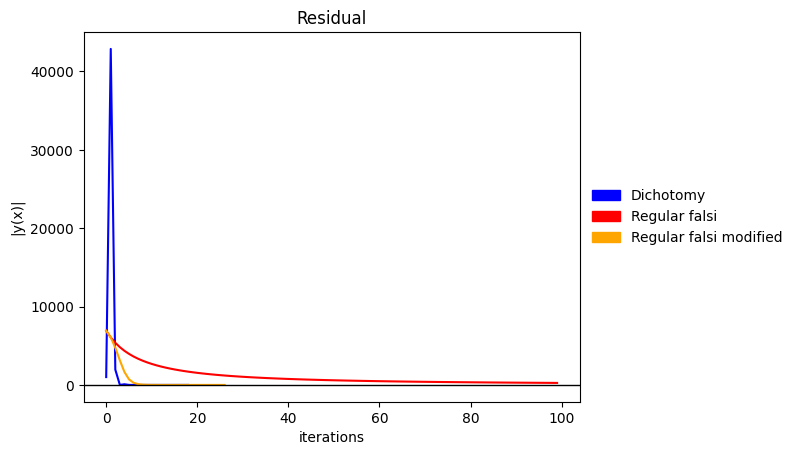

In [38]:
xs_dicho = dichotomy(y, a, b, eps, 100)[3]
xs_rf = regula_falsi(y, a, b, eps, 100)[3]
xs_rfm = regula_falsi_modified(y, a, b, eps, 100)[3]

residuals_dicho = [abs(y(x)) for x in xs_dicho]
residual_rf = [abs(y(x)) for x in xs_rf]
residual_rfm = [abs(y(x)) for x in xs_rfm]

plt.title('Residual')
plt.legend(handles=[mpatches.Patch(color='blue', label='Dichotomy'), mpatches.Patch(color='red', label='Regular falsi'), mpatches.Patch(color='orange', label='Regular falsi modified')], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.plot(ns[:len(residuals_dicho)], residuals_dicho, color='blue')
plt.plot(ns[:len(residual_rf)], residual_rf, color = 'red')
plt.plot(ns[:len(residual_rfm)], residual_rfm, color = 'orange')
plt.xlabel("iterations")
plt.ylabel("|y(x)|")
plt.axhline(y=0, lw=1, color='k')

plt.show()

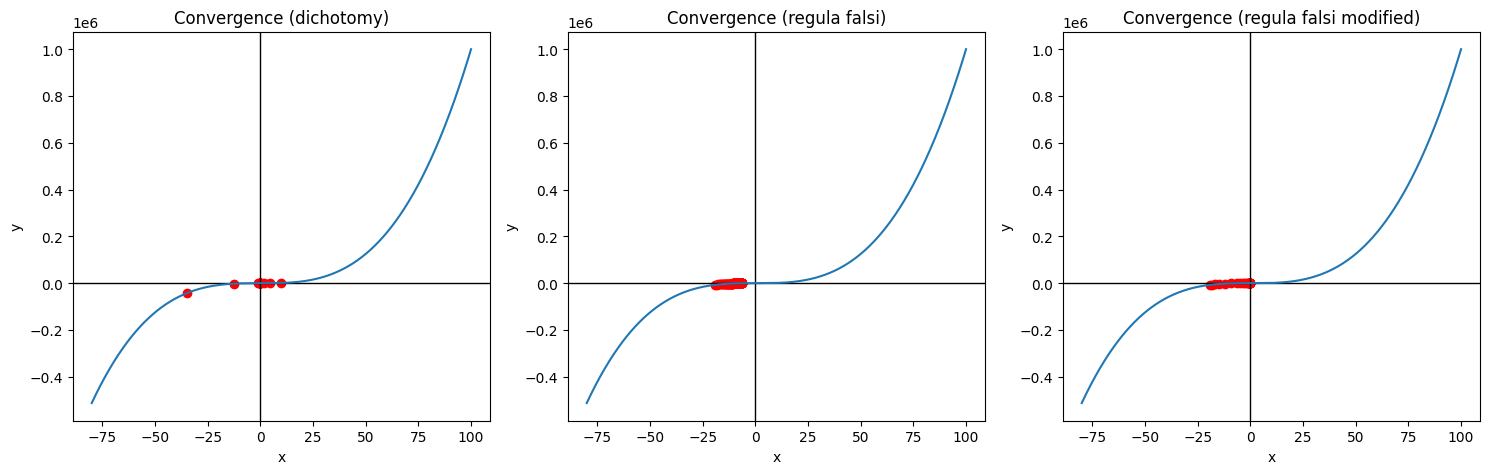

In [39]:
cs = np.arange(-80, 100, eps)
ys = y(cs)

ys_dicho = [y(x) for x in xs_dicho]
ys_rf = [y(x) for x in xs_rf]
ys_rfm = [y(x) for x in xs_rfm]


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].set_title("Convergence (dichotomy)")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].axhline(y=0, lw=1, color='k')
axes[0].axvline(x=0, lw=1, color='k')
axes[0].plot(cs, ys)
axes[0].scatter(xs_dicho, ys_dicho, color='red')

axes[1].set_title("Convergence (regula falsi)")
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].axhline(y=0, lw=1, color='k')
axes[1].axvline(x=0, lw=1, color='k')
axes[1].plot(cs, ys)
axes[1].scatter(xs_rf, ys_rf, color='red')

axes[2].set_title("Convergence (regula falsi modified)")
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].axhline(y=0, lw=1, color='k')
axes[2].axvline(x=0, lw=1, color='k')
axes[2].plot(cs, ys)
axes[2].scatter(xs_rfm, ys_rfm, color='red')

plt.tight_layout()
plt.show()

### $y = e^x -2$

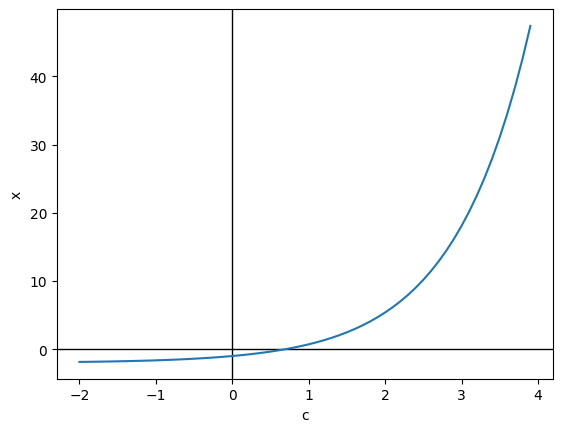

In [40]:
y = lambda x: np.e ** x -2
cs = np.arange(-2, 4, 0.1)
ys = y(cs)

plt.xlabel('c')
plt.ylabel('x')
plt.axhline(y=0, lw=1, color='k')
plt.axvline(x=0, lw=1, color='k')
plt.plot(cs, ys)

In [41]:
b = 4
a = -2
eps = 10**(-3)
ns = np.arange(0, 1000, 1)

In [42]:
print(f"Коэффициент лобового сопротивления c = {dichotomy(y, a, b, eps)[0]} - метод дихотомии")
print(f"Коэффициент лобового сопротивления c = {regula_falsi(y, a, b, eps)[0]} - regula falsi")
print(f"Коэффициент лобового сопротивления c = {regula_falsi_modified(y, a, b, eps)[0]} - regula falsi modified")

Коэффициент лобового сопротивления c = 0.693115234375 - метод дихотомии
Коэффициент лобового сопротивления c = 0.6863775455087269 - regula falsi
Коэффициент лобового сопротивления c = 0.6931471424602574 - regula falsi modified


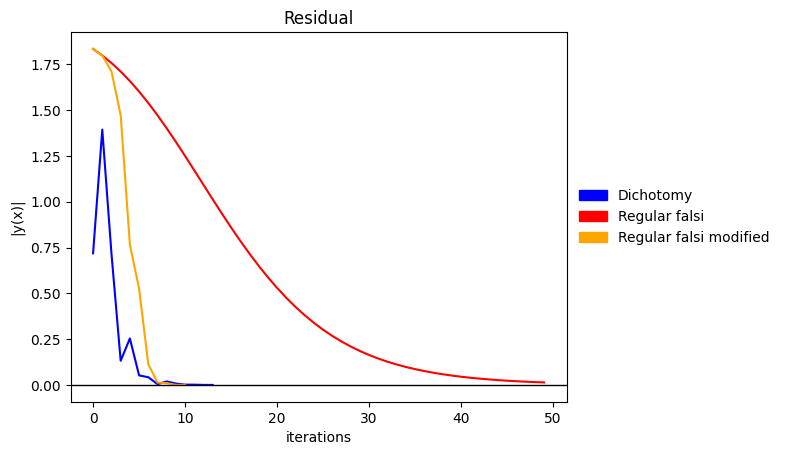

In [43]:
xs_dicho = dichotomy(y, a, b, eps, 100)[3]
xs_rf = regula_falsi(y, a, b, eps, 100)[3]
xs_rfm = regula_falsi_modified(y, a, b, eps, 100)[3]

residuals_dicho = [abs(y(x)) for x in xs_dicho]
residual_rf = [abs(y(x)) for x in xs_rf]
residual_rfm = [abs(y(x)) for x in xs_rfm]

plt.title('Residual')
plt.legend(handles=[mpatches.Patch(color='blue', label='Dichotomy'), mpatches.Patch(color='red', label='Regular falsi'), mpatches.Patch(color='orange', label='Regular falsi modified')], loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.plot(ns[:len(residuals_dicho)], residuals_dicho, color='blue')
plt.plot(ns[:len(residual_rf)], residual_rf, color = 'red')
plt.plot(ns[:len(residual_rfm)], residual_rfm, color = 'orange')
plt.xlabel("iterations")
plt.ylabel("|y(x)|")
plt.axhline(y=0, lw=1, color='k')

plt.show()

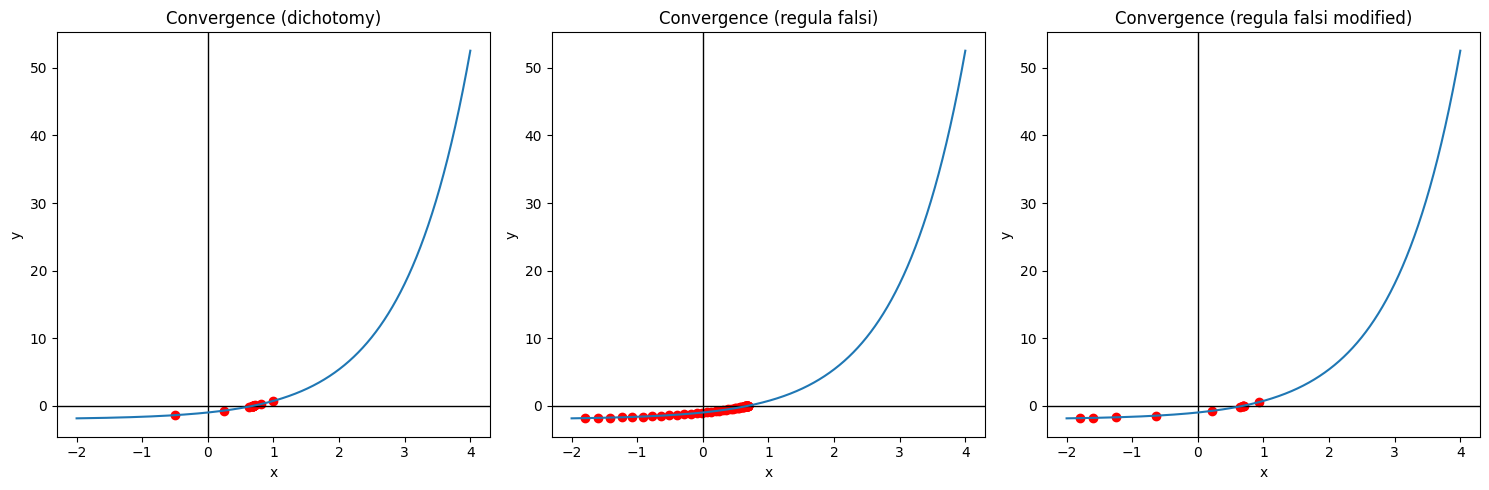

In [44]:
cs = np.arange(-2, 4, eps)
ys = y(cs)

ys_dicho = [y(x) for x in xs_dicho]
ys_rf = [y(x) for x in xs_rf]
ys_rfm = [y(x) for x in xs_rfm]


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].set_title("Convergence (dichotomy)")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].axhline(y=0, lw=1, color='k')
axes[0].axvline(x=0, lw=1, color='k')
axes[0].plot(cs, ys)
axes[0].scatter(xs_dicho, ys_dicho, color='red')

axes[1].set_title("Convergence (regula falsi)")
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].axhline(y=0, lw=1, color='k')
axes[1].axvline(x=0, lw=1, color='k')
axes[1].plot(cs, ys)
axes[1].scatter(xs_rf, ys_rf, color='red')

axes[2].set_title("Convergence (regula falsi modified)")
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].axhline(y=0, lw=1, color='k')
axes[2].axvline(x=0, lw=1, color='k')
axes[2].plot(cs, ys)
axes[2].scatter(xs_rfm, ys_rfm, color='red')

plt.tight_layout()
plt.show()

## Условие задачи 2

## Задача 2.2

Используя **метод Ньютона**, *regula falsi*, **модифицированный regula falsi**, **метод секущих** и **метод Стеффенсена**, найти положительный корень уравнения:

$$
4(1 - x^2) - e^x = 0.
$$

Сравнить методы по скорости сходимости и количеству итераций.

Используя **метод Ньютона** и «**уточнённый**» метод Ньютона (при \( m = 2 \)), найти решение уравнения:

$$
x^2 e^x = 0
$$

при начальном приближении $x^{(0)} = 1$.  
Сравнить результаты и скорость сходимости.
